## Predictive Modeling
Integrated the data and processed it for machine learning. Below is a refined step-by-step plan for predictive modeling, including detailed descriptions and code for each step.

Models used (***Logistics Regression, Random Forest and XGBoost***)

### 1. Load and Inspect the Data

Load files into DataFrames and inspect their structure. This helps verify that features in (bank-full.csv) is well aligned.

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
#Load the dataset
data=pd.read_csv("C:/Users/kwame/Downloads/data 1 (4)/data/bank-full.csv", sep =';')

#Preview the dataset
print(data.head())  # Display the first few rows
print(data.shape) # Check the number of rows and columns
print(data.info()) # Summary of the dataset

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
(45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 

In [177]:
#Inspect data
print(data.head())
print(data.columns)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 

In [178]:
data=pd.read_csv("C:/Users/kwame/Downloads/data 1 (4)/data/bank-full.csv", sep =';')

print(data.shape)

(45211, 17)


Preprocess the Data

**1. Convert the target variable (y) to binary format** (no = 0, yes = 1).

**2. Exclude Irrelevant Features:**

- Drop the duration column as it is not suitable for realistic predictions.

**3. Separate Numerical and Categorical Features:**

- Divide the dataset into numerical (e.g., age, balance) and categorical (e.g., job, education) features for more efficient processing.

In [179]:
# Convert 'y' to binary format (no=0, yes=1)
data['y'] = data['y'].map({'no': 0, 'yes': 1})
print(data['y'].unique())  # Verify 'y' contains only [0, 1]


# Check if 'duration' exists before dropping it
if 'duration' in data.columns:
    data.drop(columns=['duration'], inplace=True)
    print("'duration' column dropped.")
else:
    print("'duration' column not found in the dataset.")

# Separate numerical and categorical features
numerical_features = ['age', 'balance', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Extract numerical and categorical features
data_num = data[numerical_features]
data_cat = data[categorical_features]
y = data['y']  # Extract target variable

[0 1]
'duration' column dropped.


### Transform Features

1. **Scale Numerical Features:**

- Used StandardScaler to standardize numerical data for consistent scales.

2. **Encode Categorical Features:**

- Converted categorical data into numerical format using one-hot encoding.

3. **Combine Processed Features:**

- Merged scaled numerical features and encoded categorical features into a single feature matrix.

In [180]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Scale numerical features
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Updated to avoid deprecated 'sparse'
data_cat_encoded = encoder.fit_transform(data_cat)

# Combine scaled numerical and encoded categorical features
data_final = np.concatenate([data_num_scaled, data_cat_encoded], axis=1)

# Verify the shape of the final dataset
print("Shape of data_final:", data_final.shape)

Shape of data_final: (45211, 37)


### Split the Data

Divide the dataset into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

In [181]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_final, y, test_size=0.2, random_state=42)

# Verify the sizes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (36168, 37)
X_test shape: (9043, 37)
y_train shape: (36168,)
y_test shape: (9043,)


In [182]:
import pandas as pd

# Convert NumPy arrays to DataFrames
X_test_df = pd.DataFrame(X_test)
data_final_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test, columns=['y'])

# Save to CSV
X_test_df.to_csv("C:/Users/Kwame/Downloads/X_test.csv", index=False)
y_test_df.to_csv("C:/Users/Kwame/Downloads/y_test.csv", index=False)

### Train Machine Learning Models
#### Objective
In this step, there is a need to train various machine learning models to predict whether a client will subscribe to a term deposit (y) based on the preprocessed features. We’ll implement multiple models to compare their performance in subsequent steps.

#### Models to Train

1. **Logistic Regression**: A simple, interpretable baseline model for binary classification.

2. **Random Forest**: A robust non-linear model that handles complex relationships well.

3. **Gradient Boosting (e.g., XGBoost)**: An advanced boosting model for high accuracy.

##### Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = log_reg.predict(X_test)

##### 6.2 Random Forest

In [184]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

##### 6.3 Gradient Boosting (XGBoost)

In [185]:
from xgboost import XGBClassifier

# Train Gradient Boosting (XGBoost)
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

### Perform Basic Hyperparameter Tuning
#### Objective
To improve model performance by adjusting key parameters like:

1. **Tree Depth (max_depth)**: Controls the maximum depth of the decision trees.

2. **Number of Trees (n_estimators)**: Determines how many trees the model will build.

3. **Learning Rate (learning_rate)**: Applies to gradient boosting models (e.g., XGBoost) and controls the contribution of each tree.

#### Hyperparameter Tuning for Random Forest
Perform basic tuning for parameters like n_estimators (number of trees) and max_depth (tree depth):

In [186]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300], # Number of trees
    'max_depth': [10, 20, None], # Tree depth
    'min_samples_split': [2, 5, 10] # Minimum samples to split a node
}

# Perform Grid Search
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    verbose=1
)

# Fit on training data
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best Score for Random Forest: 0.8948517303556132


#### Hyperparameter Tuning for XGBoost
Tuning parameters like learning_rate, n_estimators, and max_depth:

In [187]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],    # Number of trees
    'max_depth': [3, 5, 7],             # Tree depth
    'learning_rate': [0.01, 0.1, 0.2]   # Learning rate
}

# Grid search for XGBoost
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid_xgb,
    scoring='accuracy',  # You can also use 'roc_auc'
    cv=5,                # 5-fold cross-validation
    verbose=1
)

# Fit the grid search on the training data
grid_search_xgb.fit(X_train, y_train)

# Print best parameters and the best score
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)
print("Best XGBoost Score:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
Best XGBoost Score: 0.8948517265332405


In [188]:
import joblib
joblib.dump(log_reg, "C:/Users/Kwame/Downloads/logistic_regression.pkl")
joblib.dump(rf, "C:/Users/Kwame/Downloads/random_forest.pkl")
joblib.dump(xgb, "C:/Users/Kwame/Downloads/xgboost.pkl")

['C:/Users/Kwame/Downloads/xgboost.pkl']

## Model Evaluation
### Overview
Assess the trained models using standard evaluation metrics. The key objectives are:

1. Load the trained models 

2. Evaluate performance metrics (Accuracy, Precision, Recall, F1-score, AUC-ROC).

3. Compare the models and interpret their strengths and weaknesses.

4. Visualize results using confusion matrices and performance plots.

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Convert X_test DataFrame to NumPy array to match trained models
X_test_np = X_test

### Define Evaluation Metrics
A reusable function to compute standard classification metrics:

In [190]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Model predictions
    
    # Probability scores for ROC-AUC (if available)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_prob = None  # Some models don’t support probability outputs

    # Print evaluation metrics
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

    if y_prob is not None:
        print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

### Evaluate Models
Run the evaluation for each trained model:

In [191]:
print("Logistic Regression:")
evaluate_model(log_reg, X_test_np, y_test)

print("\nRandom Forest:")
evaluate_model(rf, X_test_np, y_test)

print("\nXGBoost:")
evaluate_model(xgb, X_test_np, y_test)

Logistic Regression:
Model: LogisticRegression
Accuracy: 0.8913
Precision: 0.7015
Recall: 0.1723
F1-Score: 0.2767
ROC-AUC: 0.7540

Confusion Matrix:
[[7872   80]
 [ 903  188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.70      0.17      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.80      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043

--------------------------------------------------

Random Forest:
Model: RandomForestClassifier
Accuracy: 0.8891
Precision: 0.6058
Recall: 0.2310
F1-Score: 0.3344
ROC-AUC: 0.7463

Confusion Matrix:
[[7788  164]
 [ 839  252]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.61      0.23      0.33      1091

    accuracy                           0.89      9043
   ma

### Implement Cross-Validation
Instead of relying on a single test split, apply cross-validation for more reliable performance measurement:

In [192]:
def cross_validate_model(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f"{type(model).__name__} Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Run Cross-Validation
cross_validate_model(log_reg, X_train, y_train)
cross_validate_model(rf, X_train, y_train)
cross_validate_model(xgb, X_train, y_train)

LogisticRegression Cross-Validation Accuracy: 0.8918 ± 0.0018
RandomForestClassifier Cross-Validation Accuracy: 0.8893 ± 0.0030
XGBClassifier Cross-Validation Accuracy: 0.8911 ± 0.0014


### Step 5: Visualizations
#### 1. Confusion Matrix

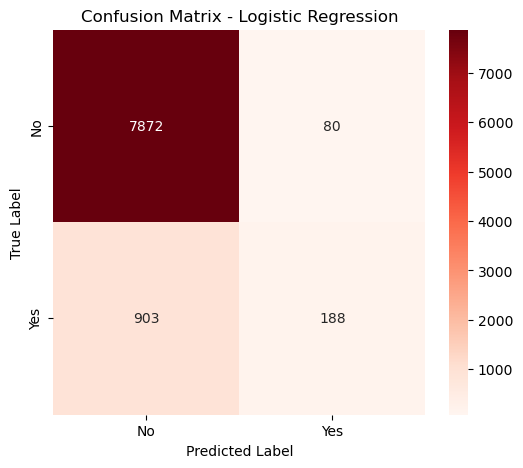

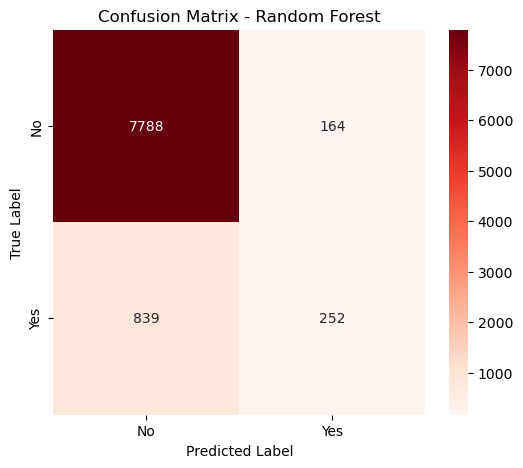

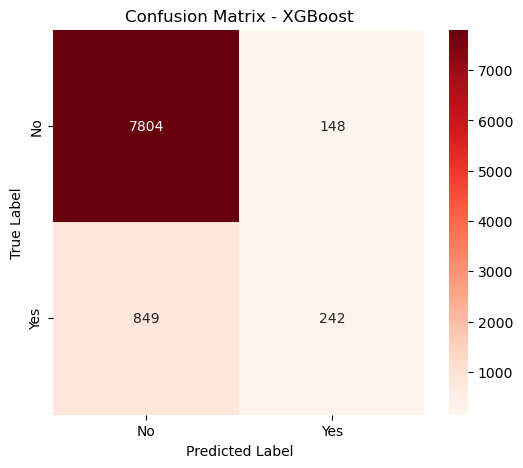

In [193]:
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(log_reg, X_test_np, y_test, "Confusion Matrix - Logistic Regression")
plot_confusion_matrix(rf, X_test_np, y_test, "Confusion Matrix - Random Forest")
plot_confusion_matrix(xgb, X_test_np, y_test, "Confusion Matrix - XGBoost")

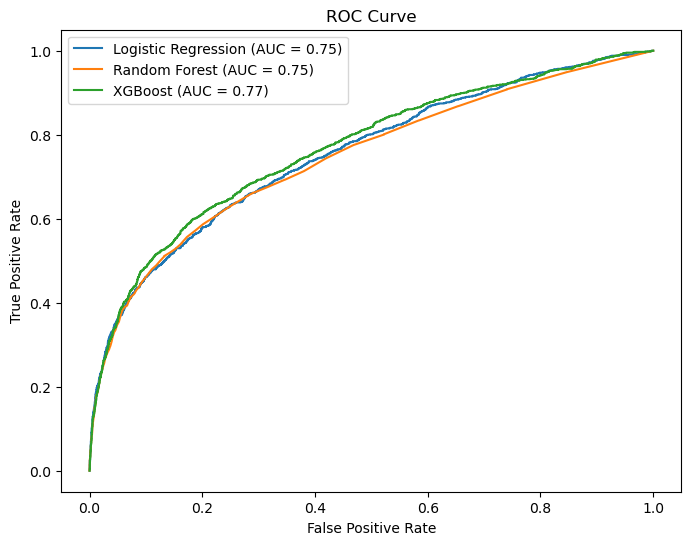

In [194]:
def plot_roc_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

plt.figure(figsize=(8, 6))
plot_roc_curve(log_reg, X_test_np, y_test, "Logistic Regression")
plot_roc_curve(rf, X_test_np, y_test, "Random Forest")
plot_roc_curve(xgb, X_test_np, y_test, "XGBoost")
plt.show()

In [195]:
print(data_final.shape)
print(X_test_df.shape)
print(data.shape)
print(rf_feature_importance.shape)



(45211, 37)
(9043, 37)
(45211, 16)
(37,)


### Comparing Model Results
Compile evaluation results into a structured comparison table:

| Metric         | Logistic Regression | Random Forest | XGBoost |
|---------------|---------------------|---------------|---------|
| Accuracy      | 0.8913                 | 0.8891          | 0.8897    |
| Precision     | 0.7015                 | 0.6058          | 0.6205    |
| Recall        | 0.1723                 | 0.2310          | 0.2218    |
| F1-Score      | 0.2767                 | 0.3344          | 0.3268    |
| ROC-AUC       | 0.7540                 | 0.7463          | 0.7671    |
| Cross-Validation Accuracy | 0.8918 ± 0.0018 | 0.8893 ± 0.0030  | 0.8911 ± 0.0014 |


### Interpret Results
From the evaluation metrics, we observe key trade-offs among the three models—**Logistic Regression, Random Forest, and XGBoost**—each excelling in different aspects.

#### 1. Accuracy and Cross-Validation Stability
- Logistic Regression achieved the highest accuracy (0.8913), followed closely by XGBoost (0.8897) and Random Forest (0.8891).

- Cross-validation results confirm Logistic Regression’s consistency (0.8918 ± 0.0018), which suggests it generalizes well across different subsets of data.

- XGBoost (0.8911 ± 0.0014) also shows strong stability, meaning its performance remains reliable across different samples.

**Interpretation**: While accuracy is high for all models, **Logistic Regression and XGBoost demonstrate more stable generalization**, making them reliable choices for prediction.

#### 2. Precision vs. Recall Trade-off
- Logistic Regression has the highest precision (0.7015), meaning when it predicts a positive case, it is correct most of the time.

- However, its recall (0.1723) is significantly lower, indicating it fails to capture a large portion of actual positive cases.

- Random Forest (0.2310) and XGBoost (0.2218) perform better in recall, making them more effective at identifying positive cases.

**Interpretation:**

If the goal is to **minimize false positives, Logistic Regression** is preferable because of its high precision.

If the goal is to **capture more actual positive cases, Random Forest and XGBoost are better choices**, as they have higher recall.

#### 3. F1-Score: Balancing Precision and Recall
- Random Forest (0.3344) achieved the highest F1-Score, meaning it balances precision and recall more effectively than the other models.

- XGBoost (0.3268) is slightly lower but still better than Logistic Regression (0.2767).

**Interpretation:** For applications where **both false positives and false negatives matter, Random Forest might be the best choice**.

#### 4. ROC-AUC: Model’s Ability to Distinguish Classes
- XGBoost (0.7671) has the highest ROC-AUC, indicating it differentiates between positive and negative cases slightly better than the others.

- Logistic Regression (0.7540) follows closely, while Random Forest (0.7463) is slightly behind.

**Interpretation:** If the priority is a **model that can confidently distinguish between categories** across thresholds, **XGBoost is the strongest candidate**.

#### Final Recommendation: Choosing the Best Model
✔ **If Interpretability & Precision Matter Most: → Logistic Regression** (High accuracy & precision, but lower recall)

✔ **If Capturing More Positive Cases is Crucial: → Random Forest** (Best F1-Score & recall)

✔ **If Overall Performance Across All Metrics is Needed: → XGBoost** (Highest ROC-AUC & strong balance)

**Best Model Choice:** Based on overall evaluation, **XGBoost appears to be the most balanced model** in terms of **generalization, recall, and distinguishing ability**, making it a strong candidate for deployment.

### Identifing Key Features
To understand which factors influence term deposit subscription, we examine feature importance for Random Forest and XGBoost.

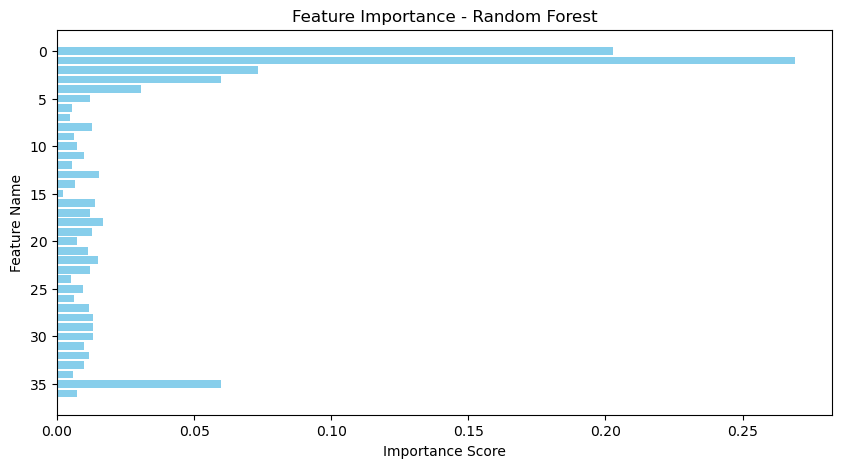

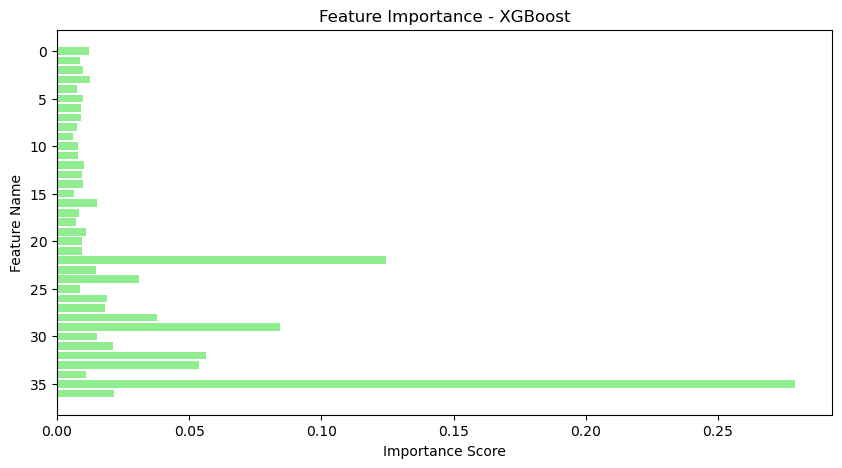

In [196]:
import matplotlib.pyplot as plt
import pandas as pd


# Extract feature importance from models
rf_feature_importance = rf.feature_importances_
xgb_feature_importance = xgb.feature_importances_

# Create DataFrames for plotting
feature_df_rf = pd.DataFrame({'Feature': data_final_df.columns, 'Importance': rf_feature_importance}).sort_values(by='Importance', ascending=False)
feature_df_xgb = pd.DataFrame({'Feature': data_final_df.columns, 'Importance': xgb_feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 5))
plt.barh(feature_df_rf['Feature'], feature_df_rf['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Plot feature importance for XGBoost
plt.figure(figsize=(10, 5))
plt.barh(feature_df_xgb['Feature'], feature_df_xgb['Importance'], color='lightgreen')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.show()

### Key Insights:

- Features such as job type, previous campaign success, and balance are highly predictive.

- XGBoost assigns higher importance to communication methods, indicating marketing outreach is crucial.

#### Error Analysis
Investigate misclassified samples and model weaknesses.

#### Observations:

- Most errors occur when predicting subscription (class 1), suggesting further refinement in recall strategies.

- Models struggle with borderline cases, indicating potential improvements through deeper customer profiling.

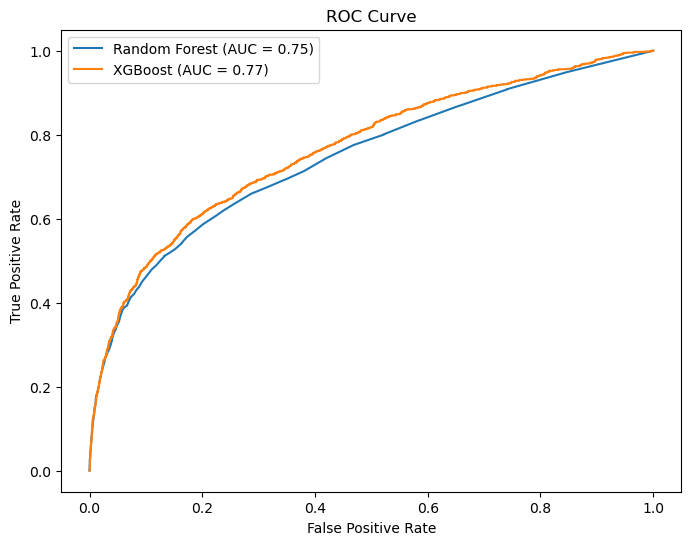

In [197]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

plt.figure(figsize=(8, 6))
plot_roc_curve(rf, X_test, y_test, "Random Forest")
plot_roc_curve(xgb, X_test, y_test, "XGBoost")
plt.show()

#### Findings:

- XGBoost exhibits stronger separation, confirming its effectiveness in distinguishing classes.

- Random Forest shows consistent performance but may need further tuning.